In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Reading Output

In [2]:
# filepath
# LEVEL2 = '/Volumes/LaCie/datasets/Physionet/mimic_extract/all_hourly_data.h5'
LEVEL2 = 'all_hourly_data.h5'


In [3]:
X_level2 = pd.read_hdf(LEVEL2, 'vitals_labs')
X_mean_level2 = pd.read_hdf(LEVEL2, 'vitals_labs_mean')
Y_level2 = pd.read_hdf(LEVEL2, 'interventions')
S_level2 = pd.read_hdf(LEVEL2, 'patients')

In [5]:
S_level2.columns

Index(['gender', 'ethnicity', 'age', 'insurance', 'admittime',
       'diagnosis_at_admission', 'dischtime', 'discharge_location',
       'fullcode_first', 'dnr_first', 'fullcode', 'dnr', 'dnr_first_charttime',
       'cmo_first', 'cmo_last', 'cmo', 'deathtime', 'intime', 'outtime',
       'los_icu', 'admission_type', 'first_careunit', 'mort_icu', 'mort_hosp',
       'hospital_expire_flag', 'hospstay_seq', 'readmission_30', 'max_hours'],
      dtype='object')

#### check age

In [6]:
S_level2['age'].describe()

# S_level2['ethnicity'].describe()
# S_level2['los_icu'].describe()

count    34472.000000
mean        75.029209
std         55.853725
min         15.052693
25%         52.466861
50%         65.741463
75%         78.016920
max        310.280861
Name: age, dtype: float64

In [7]:
# len(S_level2[S_level2['age']>100])
len(S_level2[S_level2['age']>300])


1836

In [8]:
# filter for age < 300
# S_level2 = S_level2[S_level2['age'] < 300]


#### filter to ICU length of stay > 36 hours (1.5 days)

In [9]:
# filter rows to los_icu > 36 hours

S_level2 = S_level2[S_level2['los_icu'] > 1.5]
S_level2['los_icu'].describe()


count    21878.000000
mean         3.554798
std          1.967672
min          1.500046
25%          2.048958
50%          2.908206
75%          4.391756
max          9.999456
Name: los_icu, dtype: float64

In [10]:
len(S_level2[S_level2['age']>300])


1202

In [11]:
# get year

# S_level2['admittime'].describe()

S_level2['year'] = pd.DatetimeIndex(S_level2['admittime']).year
S_level2['year'].describe()


count    21878.000000
mean      2150.446247
std         29.193172
min       2100.000000
25%       2125.000000
50%       2151.000000
75%       2176.000000
max       2208.000000
Name: year, dtype: float64

#### look for null values

In [12]:
S_level2.isnull().sum()

gender                        0
ethnicity                     0
age                           0
insurance                     0
admittime                     0
diagnosis_at_admission        1
dischtime                     0
discharge_location            0
fullcode_first             3288
dnr_first                  3288
fullcode                   3288
dnr                        3288
dnr_first_charttime       19565
cmo_first                  3288
cmo_last                   3288
cmo                        3288
deathtime                 19458
intime                        0
outtime                       0
los_icu                       0
admission_type                0
first_careunit                0
mort_icu                      0
mort_hosp                     0
hospital_expire_flag          0
hospstay_seq                  0
readmission_30                0
max_hours                     0
year                          0
dtype: int64

In [13]:
# find the 1 NaN
S_level2.loc[S_level2['diagnosis_at_admission'].isnull()]  #  .values.any()


,,,gender,ethnicity,age,insurance,admittime,diagnosis_at_admission,dischtime,discharge_location,fullcode_first,dnr_first,...,los_icu,admission_type,first_careunit,mort_icu,mort_hosp,hospital_expire_flag,hospstay_seq,readmission_30,max_hours,year
subject_id,hadm_id,icustay_id,,,,,,,,,,,,,,,,,,,,,
26443,147575,283217,M,WHITE,86.728382,Medicare,2183-01-13 20:19:00,NaN,2183-01-29 15:00:00,SNF,1.0,0.0,...,4.032465,EMERGENCY,MICU,0,0,0,1,0,96,2183


In [14]:
len(S_level2.loc[S_level2['diagnosis_at_admission'].notnull()])

21877

In [15]:
# drop the Nan guy

S_level2 = S_level2[S_level2['diagnosis_at_admission'].notnull()]
S_level2['los_icu'].describe()


count    21877.000000
mean         3.554777
std          1.967715
min          1.500046
25%          2.048958
50%          2.907998
75%          4.391910
max          9.999456
Name: los_icu, dtype: float64

#### also filter other DB's based on cohort selection

> cohort: `S_level2['icustay_id']`

In [16]:
# filter the other db's based on cohort selection

X_level2 = X_level2[X_level2.index.get_level_values('icustay_id').isin(set(S_level2.index.get_level_values('icustay_id')))]
# X_level2.columns
# X_level2.index.get_level_values('icustay_id').unique()
# len(X_level2.index.get_level_values('icustay_id').unique())

X_mean_level2 = X_mean_level2[X_mean_level2.index.get_level_values('icustay_id').isin(set(S_level2.index.get_level_values('icustay_id')))]
# len(X_mean_level2.index.get_level_values('icustay_id').unique())

Y_level2 = Y_level2[Y_level2.index.get_level_values('icustay_id').isin(set(S_level2.index.get_level_values('icustay_id')))]
# len(Y_level2.index.get_level_values('icustay_id').unique())


# check lengths
print(f'{len(X_level2.index.get_level_values("icustay_id").unique())}')
print(f'{len(X_mean_level2.index.get_level_values("icustay_id").unique())}')
print(f'{len(Y_level2.index.get_level_values("icustay_id").unique())}')


21877
21877
21877


# Demographics

In [17]:
def categorize_age(age):
    if age > 10 and age <= 30: 
        cat = '<31'
    elif age > 30 and age <= 50:
        cat = '31-50'
    elif age > 50 and age <= 70:
        cat = '51-70'
    else: 
        cat = '>70'
    return cat


def categorize_ethnicity(ethnicity):
    if 'ASIAN' in ethnicity:
        ethnicity = 'ASIAN'
    elif 'WHITE' in ethnicity:
        ethnicity = 'WHITE'
    elif 'HISPANIC' in ethnicity:
        ethnicity = 'HISPANIC/LATINO'
    elif 'BLACK' in ethnicity:
        ethnicity = 'BLACK'
#    elif 'AMERICAN INDIAN' in ethnicity:
#        ethnicity = 'AMERICAN INDIAN'
    else: 
        ethnicity = 'OTHER'
    return ethnicity



In [18]:
S_level2['age_bucket'] = S_level2['age'].apply(categorize_age)
S_level2['ethnicity'] = S_level2['ethnicity'].apply(categorize_ethnicity)

S_level2

,,,gender,ethnicity,age,insurance,admittime,diagnosis_at_admission,dischtime,discharge_location,fullcode_first,dnr_first,...,admission_type,first_careunit,mort_icu,mort_hosp,hospital_expire_flag,hospstay_seq,readmission_30,max_hours,year,age_bucket
subject_id,hadm_id,icustay_id,,,,,,,,,,,,,,,,,,,,,
3,145834,211552,M,WHITE,76.526792,Medicare,2101-10-20 19:08:00,HYPOTENSION,2101-10-31 13:58:00,SNF,1.0,0.0,...,EMERGENCY,MICU,0,0,0,1,0,145,2101,>70
4,185777,294638,F,WHITE,47.845047,Private,2191-03-16 00:28:00,"FEVER,DEHYDRATION,FAILURE TO THRIVE",2191-03-23 18:41:00,HOME WITH HOME IV PROVIDR,1.0,0.0,...,EMERGENCY,MICU,0,0,0,1,0,40,2191,31-50
6,107064,228232,F,WHITE,65.942297,Medicare,2175-05-30 07:15:00,CHRONIC RENAL FAILURE/SDA,2175-06-15 16:00:00,HOME HEALTH CARE,1.0,0.0,...,ELECTIVE,SICU,0,0,0,1,0,88,2175,51-70
9,150750,220597,M,OTHER,41.790228,Medicaid,2149-11-09 13:06:00,HEMORRHAGIC CVA,2149-11-14 10:15:00,DEAD/EXPIRED,1.0,0.0,...,EMERGENCY,MICU,1,1,1,1,0,127,2149,31-50
11,194540,229441,F,WHITE,50.148295,Private,2178-04-16 06:18:00,BRAIN MASS,2178-05-11 19:00:00,HOME HEALTH CARE,1.0,0.0,...,EMERGENCY,SICU,0,0,0,1,0,38,2178,51-70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99973,150202,275083,F,WHITE,65.499326,Private,2180-11-27 02:30:00,SEPSIS,2180-12-01 13:42:00,HOME HEALTH CARE,1.0,0.0,...,EMERGENCY,MICU,0,0,0,1,0,65,2180,51-70
99982,151454,221194,M,WHITE,65.158164,Medicare,2156-11-28 11:56:00,TVR,2156-12-08 13:45:00,HOME HEALTH CARE,1.0,0.0,...,EMERGENCY,CSRU,0,0,0,1,0,190,2156,51-70
99991,151118,226241,M,WHITE,47.729259,Private,2184-12-24 08:30:00,DIVERTICULITIS/SDA,2185-01-05 12:15:00,HOME,1.0,0.0,...,ELECTIVE,TSICU,0,0,0,1,0,75,2184,31-50


In [19]:
by_ethnicity = S_level2.reset_index().pivot_table(index='ethnicity',
                                                  columns='gender',
                                                  values=['icustay_id','mort_icu','mort_hosp','max_hours'],
                                                  aggfunc={'icustay_id': 'count',
                                                           'mort_icu': 'mean',
                                                           'mort_hosp':'mean',
                                                          'max_hours':'mean'},
                                                  margins=True)
by_ethnicity = by_ethnicity.sort_values(by=('icustay_id','All'))
by_ethnicity = pd.concat([by_ethnicity], keys=['ethnicity'], names=['item'])

by_insurance = S_level2.reset_index().pivot_table(index='insurance',
                                                  columns='gender',
                                                  values=['icustay_id','mort_icu','mort_hosp','max_hours'],
                                                  aggfunc={'icustay_id': 'count',
                                                           'mort_icu': 'mean',
                                                           'mort_hosp':'mean',
                                                          'max_hours':'mean'},
                                                  margins=True)
by_insurance = by_insurance.sort_values(by=('icustay_id','All'))
by_insurance = pd.concat([by_insurance], keys=['insurance'], names=['item'])

by_age = S_level2.reset_index().pivot_table(index='age_bucket',
                                            columns='gender',
                                            values=['icustay_id','mort_icu','mort_hosp','max_hours'],
                                            aggfunc={'icustay_id': 'count',
                                                     'mort_icu': 'mean',
                                                     'mort_hosp':'mean',
                                                          'max_hours':'mean'},
                                            margins=True)
by_age = by_age.sort_values(by=('icustay_id','All'))
by_age = pd.concat([by_age], keys=['age'], names=['item'])

by_admission = S_level2.reset_index().pivot_table(index='admission_type',
                                                  columns='gender',
                                                  values=['icustay_id','mort_icu','mort_hosp','max_hours'],
                                                  aggfunc={'icustay_id': 'count',
                                                           'mort_icu': 'mean',
                                                           'mort_hosp':'mean',
                                                          'max_hours':'mean'},
                                                  margins=True)
by_admission = by_admission.sort_values(by=('icustay_id','All'))
by_admission = pd.concat([by_admission], keys=['admission_type'], names=['item'])

by_unit = S_level2.reset_index().pivot_table(index='first_careunit',
                                              columns='gender',
                                              values=['icustay_id','mort_icu','mort_hosp','max_hours'],
                                              aggfunc={'icustay_id': 'count',
                                                       'mort_icu': 'mean',
                                                       'mort_hosp':'mean',
                                                          'max_hours':'mean'},
                                              margins=True)
by_unit = by_unit.sort_values(by=('icustay_id','All'))
by_unit = pd.concat([by_unit], keys=['first_careunit'], names=['item'])

#### Ethnicity stats (aggregated over all years)

from Suriyakumar paper (see Supplemental C.1, Table 6)

| ethnicity | counts |
| --------- | -------|
| asian     | 543    |
| hispanic  | 673    |
| black     | 1679   |
| other     | 3447   |
| white     | 15535  |
| all       | 21877  |



In [20]:
demographics = pd.concat([by_ethnicity, by_age, by_insurance, by_admission, by_unit],axis=0)
demographics.index.names = ['item','values']
demographics

icustay_id                max_hours             \
gender                                  F      M    All          F          M   
item           values                                                           
ethnicity      ASIAN                  236    307    543  83.127119  84.469055   
               HISPANIC/LATINO        263    410    673  84.095057  83.426829   
               BLACK                  923    756   1679  82.266522  81.798942   
               OTHER                 1417   2030   3447  89.784051  87.417734   
               WHITE                 6866   8669  15535  84.571366  84.278348   
               All                   9705  12172  21877  85.065224  84.624055   
age            <31                    441    641   1082  75.691610  80.550702   
               31-50                 1355   1955   3310  81.039114  80.994885   
               51-70                 3118   4851   7969  85.808852  84.784787   
               >70                   4791   4725   9516  86.582759  86.513228   
               All                   9705  12172  21877  85.065224  84.624055   
insurance      Self Pay                79    185    264  67.962025  82.935135   
               Government             232    407    639  83.504310  82.845209   
               Medicaid               740    982   1722  84.351351  85.012220   
               Private               2734   4389   7123  82.589247  82.324220   
               Medicare              5920   6209  12129  86.587331  86.355291   
               All                   9705  12172  21877  85.065224  84.624055   
admission_type URGENT                 273    340    613  91.490842  90.532353   
               ELECTIVE              1339   1792   3131  81.629574  80.292411   
               EMERGENCY             8093  10040  18133  85.416903  85.197112   
               All                   9705  12172  21877  85.065224  84.624055   
first_careunit TSICU                 1140   1714   2854  82.205263  87.666278   
               CCU                   1455   1929   3384  85.204124  85.651633   
               SICU                  1768   1847   3615  88.058258  87.561992   
               CSRU                  1504   2609   4113  86.422872  82.958605   
               MICU                  3838   4073   7911  83.951277  82.591701   
               All                   9705  12172  21877  85.065224  84.624055   

                                          mort_hosp                      \
gender                                All         F         M       All   
item           values                                                     
ethnicity      ASIAN            83.885820  0.101695  0.107492  0.104972   
               HISPANIC/LATINO  83.687964  0.083650  0.070732  0.075780   
               BLACK            82.055986  0.070423  0.078042  0.073853   
               OTHER            88.390484  0.175723  0.143842  0.156948   
               WHITE            84.407853  0.112147  0.098166  0.104345   
               All              84.819765  0.116435  0.103845  0.109430   
age            <31              78.570240  0.038549  0.054602  0.048059   
               31-50            81.012991  0.064945  0.065985  0.065559   
               51-70            85.185469  0.094933  0.091321  0.092734   
               >70              86.548235  0.152160  0.139048  0.145649   
               All              84.819765  0.116435  0.103845  0.109430   
insurance      Self Pay         78.454545  0.202532  0.108108  0.136364   
               Government       83.084507  0.047414  0.068796  0.061033   
               Medicaid         84.728223  0.077027  0.104888  0.092915   
               Private          82.425944  0.083394  0.078378  0.080303   
               Medicare         86.468546  0.138176  0.123852  0.130843   
               All              84.819765  0.116435  0.103845  0.109430   
admission_type URGENT           90.959217  0.139194  0.129412  0.133768   
               ELECTIVE  

## Histogram - age

Text(0, 0.5, 'count')

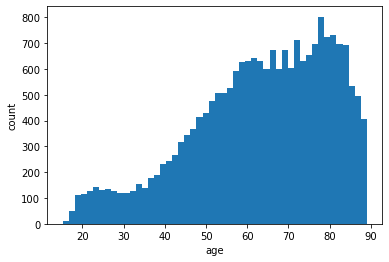

In [21]:
age = S_level2['age']
age = age[age<300]
plt.hist(age, bins=50)
plt.xlabel('age')
plt.ylabel('count')

## Histogram - los

Text(0, 0.5, 'count')

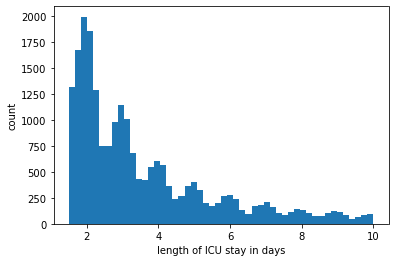

In [22]:
los = S_level2['los_icu']
plt.hist(los, bins=50)
plt.xlabel('length of ICU stay in days')
plt.ylabel('count')

# Vitals and Labs
#### `level2` stats

In [23]:
vitals_mean = pd.DataFrame(X_mean_level2.mean(),columns=['mean'])
vitals_std = pd.DataFrame(X_mean_level2.std(),columns=['stdev'])
vitals_missing = pd.DataFrame(X_mean_level2.isnull().sum()/X_mean_level2.shape[0]*100,columns=['missing percent'])

vitals_summary = pd.concat([vitals_mean,vitals_std,vitals_missing],axis=1)
vitals_summary.index = vitals_summary.index.droplevel(1)
vitals_summary.sort_values(by='missing percent', ascending=True,inplace=True)
vitals_summary

,mean,stdev,missing percent
LEVEL2,,,
heart rate,85.399466,17.377790,9.674409
respiratory rate,19.245137,5.791959,11.075490
systolic blood pressure,122.198560,22.223874,12.494467
diastolic blood pressure,60.892632,14.174014,12.515027
mean blood pressure,79.600369,15.663135,12.962861
...,...,...,...
albumin ascites,1.729897,0.834437,99.994833
creatinine ascites,3.579091,7.620839,99.997071
creatinine body fluid,8.518519,14.553931,99.998083


In [24]:
len(vitals_summary)

104

In [29]:
vitals_summary['missing percent'].describe()

count    104.000000
mean      91.108026
std       20.271055
min        9.674409
25%       92.183734
50%       96.936371
75%       99.863301
max       99.998242
Name: missing percent, dtype: float64

In [26]:
vitals_summary.to_csv('level2_stat_all.csv')

## Interventions

In [27]:
mean_duration = pd.DataFrame(Y_level2.reset_index().groupby('icustay_id').agg(sum).mean()[3:],columns=['hours'])

In [28]:
# average duration of each intervention given for one icu stay 
# (colloid bolus, crystalloid bolus - number of times given)
mean_duration

,hours
vent,17.868355
vaso,11.534854
adenosine,0.002377
dobutamine,0.531654
dopamine,1.360470
epinephrine,0.843671
isuprel,0.008639
milrinone,1.341317
norepinephrine,4.044522
phenylephrine,5.480185
